<a href="https://colab.research.google.com/github/gopalm-ai/QHack2022_PortfolioRebalancing/blob/main/QAOA_PortfolioRebalancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip3 install cirq
! pip3 install qiskit

     |████████████████████████████████| 47 kB 1.9 MB/s 
     |████████████████████████████████| 328 kB 9.8 MB/s 
     |████████████████████████████████| 55 kB 2.5 MB/s 
     |████████████████████████████████| 437 kB 40.9 MB/s 
     |████████████████████████████████| 1.6 MB 33.3 MB/s 
     |████████████████████████████████| 220 kB 42.3 MB/s 
     |████████████████████████████████| 65 kB 2.7 MB/s 
     |████████████████████████████████| 145 kB 46.8 MB/s 
     |████████████████████████████████| 97 kB 4.5 MB/s 
     |████████████████████████████████| 49 kB 3.6 MB/s 
     |████████████████████████████████| 52 kB 843 kB/s 
     |████████████████████████████████| 53 kB 1.1 MB/s 
     |████████████████████████████████| 10.1 MB 42.8 MB/s 
     |████████████████████████████████| 38.1 MB 316 kB/s 
     |████████████████████████████████| 229 kB 52.3 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 243 kB 41.6 MB/s 
     |████████████████████████

     |████████████████████████████████| 6.5 MB 5.1 MB/s 
     |████████████████████████████████| 18.0 MB 106 kB/s 
     |████████████████████████████████| 238 kB 56.5 MB/s 
     |████████████████████████████████| 200 kB 50.0 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 1.6 MB 44.2 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 49 kB 5.1 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 943 kB 51.4 MB/s 
     |████████████████████████████████| 3.6 MB 52.2 MB/s 
     |████████████████████████████████| 113 kB 57.7 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.2-py3-none-any.whl size=11805 sha256=7452239355e56ec3d1e4e529b01302112b1575033f02ae588f88d52c9f3c9ef5
  Stored in directory: /root/.cache/pip/wheels/62/77/65/cda6eedfdd2a525bd3f479a4386930ae3088a1eb01f8c944ed
  Created wheel for python-constraint: filename=pytho

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
cd drive/MyDrive/QHack/Open_Hackathon/

/content/drive/MyDrive/QHack/Open_Hackathon


In [6]:
! pip3 install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=9bd6d8a89dd8d1b9e0fb4c80e880b6936cdced75d6c6c0b0094c2aea5113f799
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


# Import and Install Libraries

In [7]:
%load_ext autoreload
%autoreload 2

import import_ipynb
import qc_utils as utils
import cross_entropy
import cirq
from cirq.contrib.svg import SVGCircuit
import matplotlib.pyplot as plt
import sympy
import itertools
import numpy as np
import json 

class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

importing Jupyter notebook from qc_utils.ipynb
importing Jupyter notebook from cross_entropy.ipynb
Result from cross-entropy optimization: 10.00
Global maximum: 10.0


In [8]:
# Cost function to reproduces all values in the original paper by M. Hodson 2019

def C_stored(sm,sp,y):
    '''
    The Tabulated values, (T=1)
    for Table II of Hodson et. al. 2019
    '''
    
    sm = int((sm+1)/2)
    sp = int((sp+1)/2)
    y = y+1
    
    A = np.zeros((3,2,2))
    A[0,0,0]=1
    A[0,0,1]=1
    A[0,1,0]=0
    A[0,1,1]=1
    
    A[1,0,0]=0
    A[1,0,1]=1
    A[1,1,0]=1
    A[1,1,1]=1
    
    A[2,0,0]=1
    A[2,0,1]=0
    A[2,1,0]=1
    A[2,1,1]=1
    
    return A[y,sm,sp]

def C_TC(sm,sp,y):
    '''
    C_{TC}(s,y) function
    
    sm -> s^-_k
    sp -> s^+_k
    
    where:
    sm: {-1,1}
    sp: {-1,1}
    '''
    return 1/4*(3+(1-y**2-y)*sp+(1-y**2+y)*sm+(2*y**2-1)*sp*sm)

# Enumerate all possible input combinations
y_index = [-1,0,1]
sp_index = [-1,1]
sm_index = [-1,1]
combinations = itertools.product(y_index,sp_index,sm_index)

for y,sp,sm in list(combinations):
    print('Function input values: y={}, s^+_k={}, s^-_k={}'.format(y,sp,sm))
    print('Cost function value: {}'.format(C_TC(sm,sp,y))) 
    print('Stored value: {}'.format(C_stored(sm,sp,y)))
    print('')

Function input values: y=-1, s^+_k=-1, s^-_k=-1
Cost function value: 1.0
Stored value: 1.0

Function input values: y=-1, s^+_k=-1, s^-_k=1
Cost function value: 0.0
Stored value: 0.0

Function input values: y=-1, s^+_k=1, s^-_k=-1
Cost function value: 1.0
Stored value: 1.0

Function input values: y=-1, s^+_k=1, s^-_k=1
Cost function value: 1.0
Stored value: 1.0

Function input values: y=0, s^+_k=-1, s^-_k=-1
Cost function value: 0.0
Stored value: 0.0

Function input values: y=0, s^+_k=-1, s^-_k=1
Cost function value: 1.0
Stored value: 1.0

Function input values: y=0, s^+_k=1, s^-_k=-1
Cost function value: 1.0
Stored value: 1.0

Function input values: y=0, s^+_k=1, s^-_k=1
Cost function value: 1.0
Stored value: 1.0

Function input values: y=1, s^+_k=-1, s^-_k=-1
Cost function value: 1.0
Stored value: 1.0

Function input values: y=1, s^+_k=-1, s^-_k=1
Cost function value: 1.0
Stored value: 1.0

Function input values: y=1, s^+_k=1, s^-_k=-1
Cost function value: 0.0
Stored value: 0.0

Funct

# Define Notebook Parameters

In [9]:
# Do you want to load the data from a file?
load_from_file = False
data_folder = 'results'

# Define the number of portfolios to optimize
N_portfolio = 4

# For the grid search 
N_grid=20
N_trials_grid = 100
N_trials_scipy = 50

# Gradient descent 
N_trials_gd = 50
N_gd_steps = 30
lr = 0.1

# Parameters of the cross-entropy optimizer for the beta, gamma angles 
N_trials_ce = 100
N_ce_iterations = 10
N_ce_samples = 50
f_elite = 0.1

# Brute Force Search

In [10]:
# Instantiate the portfolio 
portfolio1 = utils.Portfolio(N_portfolio=N_portfolio)

# Get the benchmark parameters
benchmark_parameters = portfolio1.benchmark_values()

# Determine the results via a bruteforce search
best_bruteforce_result = portfolio1.brute_force_search(benchmark_parameters)

# Provide the optimal energy along with the state
print('='*100)
print('Brute-Force state: ', best_bruteforce_result['minimum_cost_states'])
print('Brute-Force energy: ', best_bruteforce_result['minimum_cost'])
print('='*100)

Brute-Force state:  [[1 0 1 0]]
Brute-Force energy:  0.00018825000000000008


# QAOA Soft Circuit

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


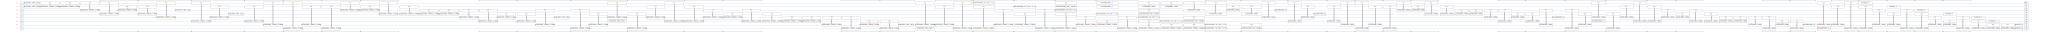

In [11]:
# Generate a QAOA circuit with p=1 depth
QAOA_circuit = portfolio1.QAOA_soft_circuit(p=1)

# plot the circuit
SVGCircuit(QAOA_circuit)

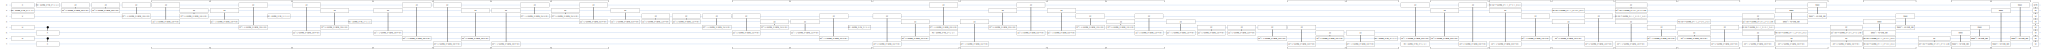

In [12]:
# Generate a QAOA circuit with p=1 depth
QAOA_circuit = portfolio1.QAOA_hard_circuit(p=1, D=2)

# plot the circuit
SVGCircuit(QAOA_circuit)

# Grid Search

In [13]:
# Determine the p=1 energy landscape for the QAOA 
if(load_from_file is True):
    QAOA_results = portfolio1.load_data_from_json(data_folder+'/QAOA_results.json')
else:
    QAOA_results = portfolio1.grid_search(QAOA_circuit,N_grid=N_grid,parameters=benchmark_parameters,n_trials=N_trials_grid)
    portfolio1.save_data_as_json(QAOA_results, data_folder)
    #portfolio1.save_data_as_json(QAOA_results,data_folder+'/QAOA_results.json')

    
penalty_cost_grid_QAOA = QAOA_results['penalty_cost_grid']
total_cost_grid_QAOA = QAOA_results['total_cost_grid']
best_holdings_QAOA = QAOA_results['min_portfolio_holdings']

gamma_grid = QAOA_results['gamma_grid']
beta_grid = QAOA_results['beta_grid']

Minimum cost solution:  0.00021057000000000004
beta: 2.00* pi
gamma: 0.11* pi 


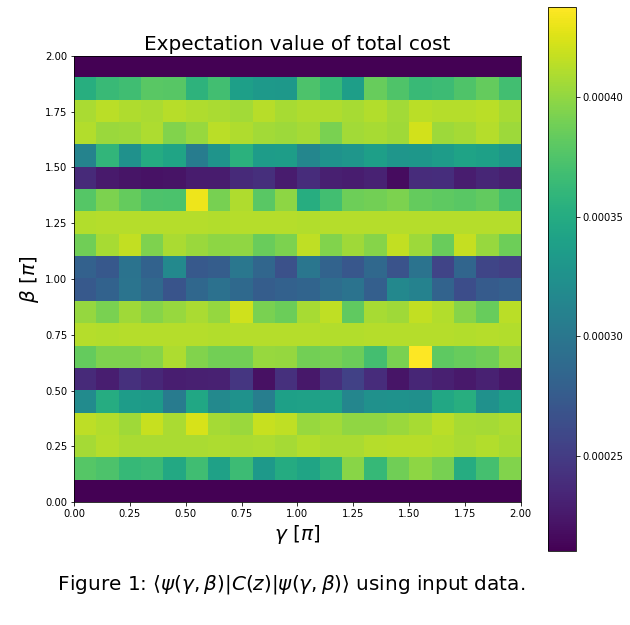

In [14]:
extent = [0.0, 2.0, 0.0, 2.0]

print('='*100)
print('Minimum cost solution: ', QAOA_results['minimum_cost'])
print('beta: {:.2f}* pi'.format(QAOA_results['min_betas']/np.pi))
print('gamma: {:.2f}* pi '.format(QAOA_results['min_gamma']/np.pi))
print('='*100)

plt.figure(figsize=(10,10))
plt.title('Expectation value of total cost',size=20)
plt.imshow(total_cost_grid_QAOA[::-1],extent=extent)
plt.colorbar()
plt.xlabel(r'$\gamma \ [\pi]$',size=20)
plt.ylabel(r'$\beta \ [\pi]$',size=20)

text = r'''
        Figure {}: $\langle \psi(\gamma,\beta)|C(z)|\psi(\gamma,\beta) \rangle$ using input data.
        '''.format(1)
plt.text(-.3,-0.5, text, ha='left', size=20)

plt.show()

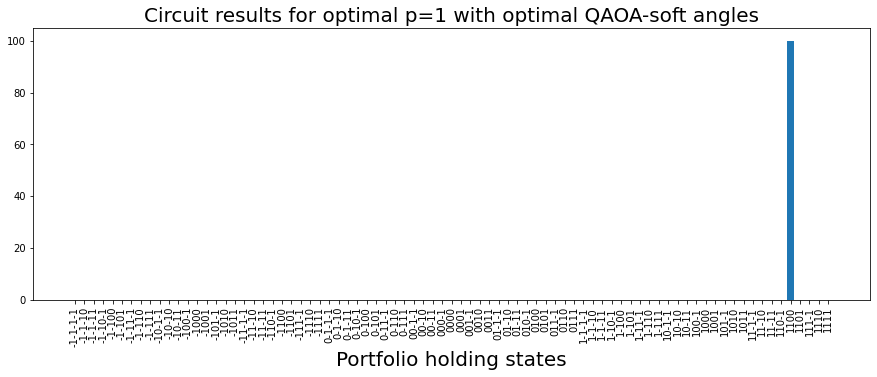

In [15]:
# Show the samples obtained from the experiments with the optimal angles

plt.figure(figsize=(15,5))
plt.title("Circuit results for optimal p=1 with optimal QAOA-soft angles", size=20)
plt.bar(np.arange(len(QAOA_results['min_portfolio_holdings']['labels'])), QAOA_results['min_portfolio_holdings']['counts'], tick_label=QAOA_results['min_portfolio_holdings']['labels'])
plt.xticks(rotation=90)
plt.xlabel('Portfolio holding states', size=20)
plt.show()

In [16]:
# Get the best results from the gridsearch

best_QAOA_result = portfolio1.determine_best_solution_from_trials(benchmark_parameters, best_holdings_QAOA)

print('='*100)
print('QAOA results:')
print('Cost of optimal states: E={:.6f}'.format(best_QAOA_result['minimum_cost']))
print('Minimum energy states: z={}'.format(best_QAOA_result['minimum_cost_states']))
print('Probability of minimum cost states: p={}'.format(best_QAOA_result['minimum_cost_probabilities']))
print('='*100)

QAOA results:
Cost of optimal states: E=0.000211
Minimum energy states: z=[[1 1 0 0]]
Probability of minimum cost states: p=[1.]


In [17]:
p_depth = np.array([1,2,3,4]).astype(int)

QAOA_circuit_p_array = []


# Generate a QAOA circuit with p=1 depth
for p in p_depth:
    QAOA_circuit_p_array.append(portfolio1.QAOA_soft_circuit(p=p))

#QAOA Circuit Scipy Optimizer

In [18]:
# Optimize the circuit using Scipy-optimizer
scipy_optimization_array_QAOA= []


if(load_from_file is True):
    
    for p in range(len(p_depth)):
        scipy_optimization_results = portfolio1.load_data_from_json(data_folder)
        #scipy_optimization_results = portfolio1.load_data_from_json(data_folder+'/QAOA_scipy_p'+str(p)+'.json')
        scipy_optimization_array_QAOA.append(scipy_optimization_results)
else:
    for k in range(len(p_depth)):
        QAOA_circuit_p = QAOA_circuit_p_array[k]
        scipy_optimization_results = portfolio1.optimize_circuit(circuit=QAOA_circuit_p,
                                                             parameters=benchmark_parameters,
                                                             n_trials=N_trials_scipy,
                                                             p=p_depth[k])
        
        print('='*100)
        print('p-depth: ', p_depth[k])
        print('QAOA scipy results:')
        print('Cost of optimal states: E={:.6f}'.format(scipy_optimization_results['best_solutions']['minimum_cost']))
        print('Minimum energy states: z={}'.format(scipy_optimization_results['best_solutions']['minimum_cost_states']))
        print('Probability of minimum cost states: p={}'.format(scipy_optimization_results['best_solutions']['minimum_cost_probabilities']))
        print('='*100)

        scipy_optimization_array_QAOA.append(scipy_optimization_results)

# Save the results to a file
for p in range(len(p_depth)):
    portfolio1.save_data_as_json(scipy_optimization_array_QAOA[p], data_folder)
    # portfolio1.save_data_as_json(scipy_optimization_array_QAOA[p],data_folder+'/QAOA_scipy_p'+str(p)+'.json')

optimal cost:  0.13167054699999997
p-depth:  1
QAOA scipy results:
Cost of optimal states: E=0.000211
Minimum energy states: z=[[1 1 0 0]]
Probability of minimum cost states: p=[0.02]
optimal cost:  0.13888823599999997
p-depth:  2
QAOA scipy results:
Cost of optimal states: E=0.000188
Minimum energy states: z=[[1 0 1 0]]
Probability of minimum cost states: p=[0.02]
optimal cost:  0.17969348939999996
p-depth:  3
QAOA scipy results:
Cost of optimal states: E=0.000493
Minimum energy states: z=[[-1  1  1  1]]
Probability of minimum cost states: p=[0.02]
optimal cost:  0.16465276880000002
p-depth:  4
QAOA scipy results:
Cost of optimal states: E=0.000188
Minimum energy states: z=[[1 0 1 0]]
Probability of minimum cost states: p=[0.04]


# Optimize QAOA-soft circuit with gradient descent optimization

In [20]:
# Optimize the circuit using Scipy-optimizer
gd_optimization_array_QAOA= []


if(load_from_file is True):
    
    for p in range(len(p_depth)):
        gd_results = portfolio1.load_data_from_json(data_folder+'/QAOA_gd_p'+str(p)+'.json')
        gd_optimization_array_QAOA.append(gd_results)
else:


    for k in range(len(p_depth)):
        QAOA_circuit_p = QAOA_circuit_p_array[k]
        gd_results = portfolio1.optimize_circuit_GD(circuit=QAOA_circuit_p,
                                                    parameters=benchmark_parameters,
                                                    n_trials=N_trials_gd,
                                                    p=p_depth[k],
                                                    lr= lr,
                                                    steps=N_gd_steps)

        print('='*100)
        print('p-depth: ', p_depth[k])
        print('QAOA Gradient Descent results:')
        print('Cost of optimal states: E={:.6f}'.format(gd_results['best_solutions']['minimum_cost']))
        print('Minimum energy states: z={}'.format(gd_results['best_solutions']['minimum_cost_states']))
        print('Probability of minimum cost states: p={}'.format(gd_results['best_solutions']['minimum_cost_probabilities']))
        print('='*100)

        gd_optimization_array_QAOA.append(gd_results)


# Save the results to a file
for p in range(len(p_depth)):
  portfolio1.save_data_as_json(gd_optimization_array_QAOA[p],data_folder)
  #portfolio1.save_data_as_json(gd_optimization_array_QAOA[p],data_folder+'/QAOA_gd_p'+str(p)+'.json')

100%|██████████| 30/30 [00:21<00:00,  1.40it/s]


p-depth:  1
QAOA Gradient Descent results:
Cost of optimal states: E=0.000188
Minimum energy states: z=[[1 0 1 0]]
Probability of minimum cost states: p=[0.02]


100%|██████████| 30/30 [00:59<00:00,  1.97s/it]


p-depth:  2
QAOA Gradient Descent results:
Cost of optimal states: E=0.000401
Minimum energy states: z=[[0 1 0 1]]
Probability of minimum cost states: p=[0.02]


100%|██████████| 30/30 [01:48<00:00,  3.62s/it]


p-depth:  3
QAOA Gradient Descent results:
Cost of optimal states: E=0.000211
Minimum energy states: z=[[1 1 0 0]]
Probability of minimum cost states: p=[0.06]


100%|██████████| 30/30 [02:43<00:00,  5.45s/it]


p-depth:  4
QAOA Gradient Descent results:
Cost of optimal states: E=0.000188
Minimum energy states: z=[[1 0 1 0]]
Probability of minimum cost states: p=[0.02]


# Optimize QAOA-soft circuit with cross entropy optimization

In [23]:
ce_optimization_array_QAOA = []



if(load_from_file is True):
    
    for p in range(len(p_depth)):
        ce_results = portfolio1.load_data_from_json(data_folder)
        # ce_results = portfolio1.load_data_from_json(data_folder+'/QAOA_ce_p'+str(p)+'.json')
        ce_optimization_array_QAOA.append(ce_results)
else:
    for k in range(len(p_depth)):
        QAOA_circuit_p = QAOA_circuit_p_array[k]

        ce_results =portfolio1.optimize_circuit_angles_cross_entropy(QAOA_circuit_p,
                                                                     benchmark_parameters,
                                                                     p=p_depth[k],
                                                                     n_trials=N_trials_ce,
                                                                     iterations=N_ce_iterations,
                                                                     f_elite=f_elite,
                                                                     Nce_samples = N_ce_samples)

        print('='*100)
        print('p-depth: ', p_depth[k])
        print('QAOA Cross entropy optimization results:')
        print('Cost of optimal states: E={:.6f}'.format(ce_results['best_solutions']['minimum_cost']))
        print('Minimum energy states: z={}'.format(ce_results['best_solutions']['minimum_cost_states']))
        print('Probability of minimum cost states: p={}'.format(ce_results['best_solutions']['minimum_cost_probabilities']))
        print('='*100)

        ce_optimization_array_QAOA.append(ce_results)


# Save the results to a file
for p in range(len(p_depth)):
    portfolio1.save_data_as_json(ce_optimization_array_QAOA[p],data_folder)
    #portfolio1.save_data_as_json(ce_optimization_array_QAOA[p],data_folder+'/QAOA_ce_p'+str(p)+'.json')

100%|██████████| 50/50 [00:10<00:00,  4.68it/s]


k=0, mean_E=0.031642, std_E=0.004783, gammas[pi]=[1.25134083], betas[pi]=[0.15408732]


100%|██████████| 50/50 [00:10<00:00,  4.70it/s]


k=1, mean_E=0.030735, std_E=0.002877, gammas[pi]=[1.63496966], betas[pi]=[0.26610341]


100%|██████████| 50/50 [00:11<00:00,  4.17it/s]


k=2, mean_E=0.037049, std_E=0.006282, gammas[pi]=[1.58123243], betas[pi]=[0.2728447]


100%|██████████| 50/50 [00:11<00:00,  4.51it/s]


k=3, mean_E=0.036651, std_E=0.002456, gammas[pi]=[1.57495544], betas[pi]=[0.26788928]


100%|██████████| 50/50 [00:10<00:00,  4.70it/s]


k=4, mean_E=0.029533, std_E=0.002415, gammas[pi]=[1.7589847], betas[pi]=[1.24020112]


100%|██████████| 50/50 [00:10<00:00,  4.67it/s]


k=5, mean_E=0.029972, std_E=0.004868, gammas[pi]=[1.84927998], betas[pi]=[1.83848522]


100%|██████████| 50/50 [00:10<00:00,  4.70it/s]


k=6, mean_E=0.027224, std_E=0.002515, gammas[pi]=[1.88982244], betas[pi]=[2.05628472]


100%|██████████| 50/50 [00:10<00:00,  4.72it/s]


k=7, mean_E=0.028267, std_E=0.005104, gammas[pi]=[1.90351897], betas[pi]=[2.05518745]


100%|██████████| 50/50 [00:10<00:00,  4.68it/s]


k=8, mean_E=0.034353, std_E=0.006115, gammas[pi]=[1.90483196], betas[pi]=[2.07348484]


100%|██████████| 50/50 [00:10<00:00,  4.74it/s]


k=9, mean_E=0.032232, std_E=0.005629, gammas[pi]=[1.92240271], betas[pi]=[2.2462744]
p-depth:  1
QAOA Cross entropy optimization results:
Cost of optimal states: E=0.000188
Minimum energy states: z=[[1 0 1 0]]
Probability of minimum cost states: p=[0.04]


100%|██████████| 50/50 [00:13<00:00,  3.77it/s]


k=0, mean_E=0.026003, std_E=0.003612, gammas[pi]=[1.19051368 1.86403603], betas[pi]=[0.85490306 0.10293852]


100%|██████████| 50/50 [00:13<00:00,  3.70it/s]


k=1, mean_E=0.034627, std_E=0.004550, gammas[pi]=[1.43139335 1.88525365], betas[pi]=[1.11586667 0.18764355]


100%|██████████| 50/50 [00:13<00:00,  3.81it/s]


k=2, mean_E=0.037134, std_E=0.004225, gammas[pi]=[1.60325627 1.86107251], betas[pi]=[ 1.16620714 -0.19797038]


100%|██████████| 50/50 [00:13<00:00,  3.74it/s]


k=3, mean_E=0.034897, std_E=0.009106, gammas[pi]=[1.69493891 1.89001602], betas[pi]=[ 1.14712156 -0.16824523]


100%|██████████| 50/50 [00:13<00:00,  3.77it/s]


k=4, mean_E=0.030296, std_E=0.004092, gammas[pi]=[1.91200457 2.04947609], betas[pi]=[ 1.14969358 -0.26966112]


100%|██████████| 50/50 [00:13<00:00,  3.74it/s]


k=5, mean_E=0.032424, std_E=0.005503, gammas[pi]=[1.68938241 1.94377653], betas[pi]=[ 1.15214565 -0.24948626]


100%|██████████| 50/50 [00:13<00:00,  3.81it/s]


k=6, mean_E=0.029726, std_E=0.008494, gammas[pi]=[1.93314214 2.00607019], betas[pi]=[ 1.14067063 -0.27904403]


100%|██████████| 50/50 [00:13<00:00,  3.74it/s]


k=7, mean_E=0.049017, std_E=0.009137, gammas[pi]=[2.16863431 1.94020739], betas[pi]=[ 1.11291773 -0.20354338]


100%|██████████| 50/50 [00:13<00:00,  3.76it/s]


k=8, mean_E=0.035934, std_E=0.012791, gammas[pi]=[2.03147606 1.77622786], betas[pi]=[ 1.10075096 -0.0305542 ]


100%|██████████| 50/50 [00:13<00:00,  3.78it/s]


k=9, mean_E=0.024554, std_E=0.002714, gammas[pi]=[2.17909751 1.9813244 ], betas[pi]=[ 1.11777381 -0.22756506]
p-depth:  2
QAOA Cross entropy optimization results:
Cost of optimal states: E=0.000188
Minimum energy states: z=[[1 0 1 0]]
Probability of minimum cost states: p=[0.02]


100%|██████████| 50/50 [00:16<00:00,  3.10it/s]


k=0, mean_E=0.034331, std_E=0.005755, gammas[pi]=[0.83891113 0.68685647 1.92683544], betas[pi]=[0.73943973 0.38688992 1.75413101]


100%|██████████| 50/50 [00:15<00:00,  3.13it/s]


k=1, mean_E=0.024481, std_E=0.002957, gammas[pi]=[0.8761032  0.5525078  1.87731576], betas[pi]=[0.74005214 0.39562994 1.6446046 ]


100%|██████████| 50/50 [00:15<00:00,  3.23it/s]


k=2, mean_E=0.020424, std_E=0.001598, gammas[pi]=[0.78329692 0.46377089 2.21887107], betas[pi]=[0.65352802 0.28755325 1.61298528]


100%|██████████| 50/50 [00:15<00:00,  3.17it/s]


k=3, mean_E=0.019232, std_E=0.000941, gammas[pi]=[0.8376845  0.45922044 2.24178799], betas[pi]=[0.60255657 0.10425374 1.61218138]


100%|██████████| 50/50 [00:15<00:00,  3.13it/s]


k=4, mean_E=0.020123, std_E=0.001111, gammas[pi]=[0.64023121 0.4646384  2.33841532], betas[pi]=[0.64872123 0.24819296 1.61126298]


100%|██████████| 50/50 [00:16<00:00,  3.03it/s]


k=5, mean_E=0.019573, std_E=0.001327, gammas[pi]=[0.50554833 0.4712463  2.37560682], betas[pi]=[0.69005556 0.36490286 1.61392484]


100%|██████████| 50/50 [00:15<00:00,  3.21it/s]


k=6, mean_E=0.017726, std_E=0.000806, gammas[pi]=[0.40542377 0.50500663 2.38483656], betas[pi]=[0.71230816 0.36499274 1.62069578]


100%|██████████| 50/50 [00:15<00:00,  3.21it/s]


k=7, mean_E=0.019820, std_E=0.001384, gammas[pi]=[0.30368941 0.460246   2.46166823], betas[pi]=[0.75244564 0.5908771  1.61243763]


100%|██████████| 50/50 [00:15<00:00,  3.17it/s]


k=8, mean_E=0.020216, std_E=0.000212, gammas[pi]=[0.39707052 0.47362117 2.41840807], betas[pi]=[0.7186076  0.45022047 1.61470509]


100%|██████████| 50/50 [00:15<00:00,  3.13it/s]


k=9, mean_E=0.018252, std_E=0.002002, gammas[pi]=[0.54854514 0.51241405 2.34552763], betas[pi]=[0.65245391 0.14698117 1.6210162 ]
p-depth:  3
QAOA Cross entropy optimization results:
Cost of optimal states: E=0.000188
Minimum energy states: z=[[1 0 1 0]]
Probability of minimum cost states: p=[0.03]


100%|██████████| 50/50 [00:18<00:00,  2.66it/s]


k=0, mean_E=0.037372, std_E=0.001607, gammas[pi]=[0.23077406 1.68177679 0.76152916 1.13620039], betas[pi]=[1.11537205 1.56971482 1.79691593 0.01194289]


100%|██████████| 50/50 [00:18<00:00,  2.68it/s]


k=1, mean_E=0.039426, std_E=0.005207, gammas[pi]=[0.20305294 1.51167312 0.71234622 1.20813776], betas[pi]=[ 1.02008822  1.34890326  1.64679343 -0.13846638]


100%|██████████| 50/50 [00:18<00:00,  2.70it/s]


k=2, mean_E=0.034734, std_E=0.002640, gammas[pi]=[0.21352005 1.25230388 0.78601431 1.26325499], betas[pi]=[ 0.9790829   1.33839633  1.53887782 -0.20236626]


100%|██████████| 50/50 [00:18<00:00,  2.68it/s]


k=3, mean_E=0.023723, std_E=0.004433, gammas[pi]=[0.35534455 1.39417824 0.91662862 1.40028078], betas[pi]=[ 1.05767195  1.3283483   1.46743322 -0.19481572]


100%|██████████| 50/50 [00:18<00:00,  2.71it/s]


k=4, mean_E=0.018420, std_E=0.001431, gammas[pi]=[0.15856993 0.84033476 0.87466475 1.58823745], betas[pi]=[ 0.9343027   1.49571143  1.41065732 -0.31562619]


100%|██████████| 50/50 [00:18<00:00,  2.69it/s]


k=5, mean_E=0.017324, std_E=0.001198, gammas[pi]=[0.18201353 0.77891301 0.88902326 1.57585214], betas[pi]=[ 0.93023826  1.49556374  1.36887806 -0.30989204]


100%|██████████| 50/50 [00:18<00:00,  2.69it/s]


k=6, mean_E=0.016440, std_E=0.001236, gammas[pi]=[0.18732615 0.79589618 0.89432681 1.58563514], betas[pi]=[ 0.93564895  1.49577882  1.37030949 -0.30960106]


100%|██████████| 50/50 [00:18<00:00,  2.69it/s]


k=7, mean_E=0.017225, std_E=0.001084, gammas[pi]=[0.18427365 0.80301652 0.89304976 1.59237808], betas[pi]=[ 0.93689489  1.49911853  1.37508163 -0.31043205]


100%|██████████| 50/50 [00:18<00:00,  2.70it/s]


k=8, mean_E=0.017405, std_E=0.001193, gammas[pi]=[0.19065161 0.81942968 0.89853901 1.59844847], betas[pi]=[ 0.94194891  1.49709915  1.37565717 -0.30972249]


100%|██████████| 50/50 [00:18<00:00,  2.70it/s]


k=9, mean_E=0.017096, std_E=0.000743, gammas[pi]=[0.20209367 0.84943834 0.90827935 1.60854132], betas[pi]=[ 0.95096961  1.49289494  1.37695453 -0.30842142]
p-depth:  4
QAOA Cross entropy optimization results:
Cost of optimal states: E=0.000188
Minimum energy states: z=[[1 0 1 0]]
Probability of minimum cost states: p=[0.07]


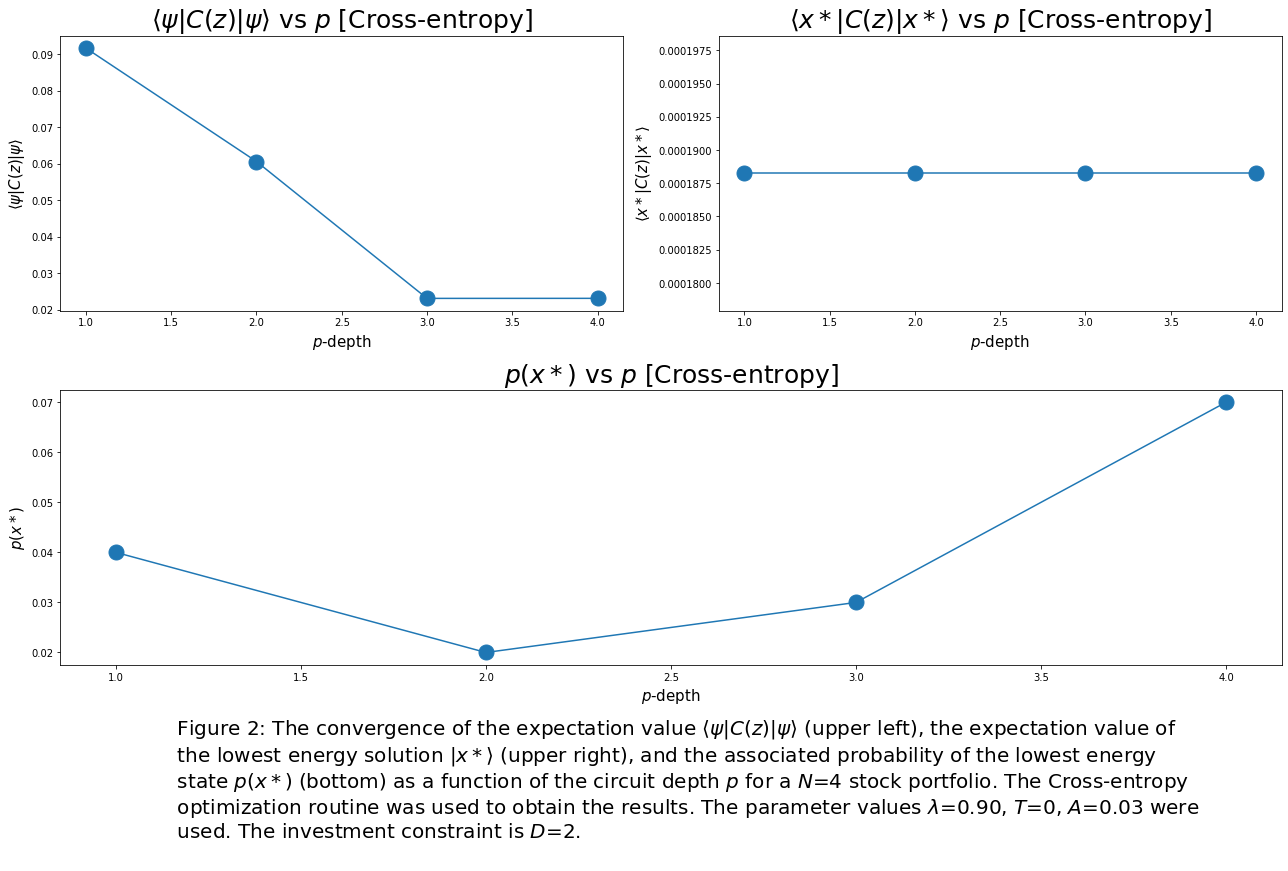

In [24]:
plot_parameters={}
plot_parameters['figure_number'] = 2
plot_parameters['optimizer_name'] = "Cross-entropy"
plot_parameters['optimizer_data'] = ce_optimization_array_QAOA
plot_parameters['p_depth'] = p_depth
plot_parameters['lambda'] = benchmark_parameters['lam']
plot_parameters['D'] = benchmark_parameters['D']
plot_parameters['T'] = benchmark_parameters['T']
plot_parameters['A'] = benchmark_parameters['A']

scipy_plot = portfolio1.plot(plot_parameters)

plt.show()

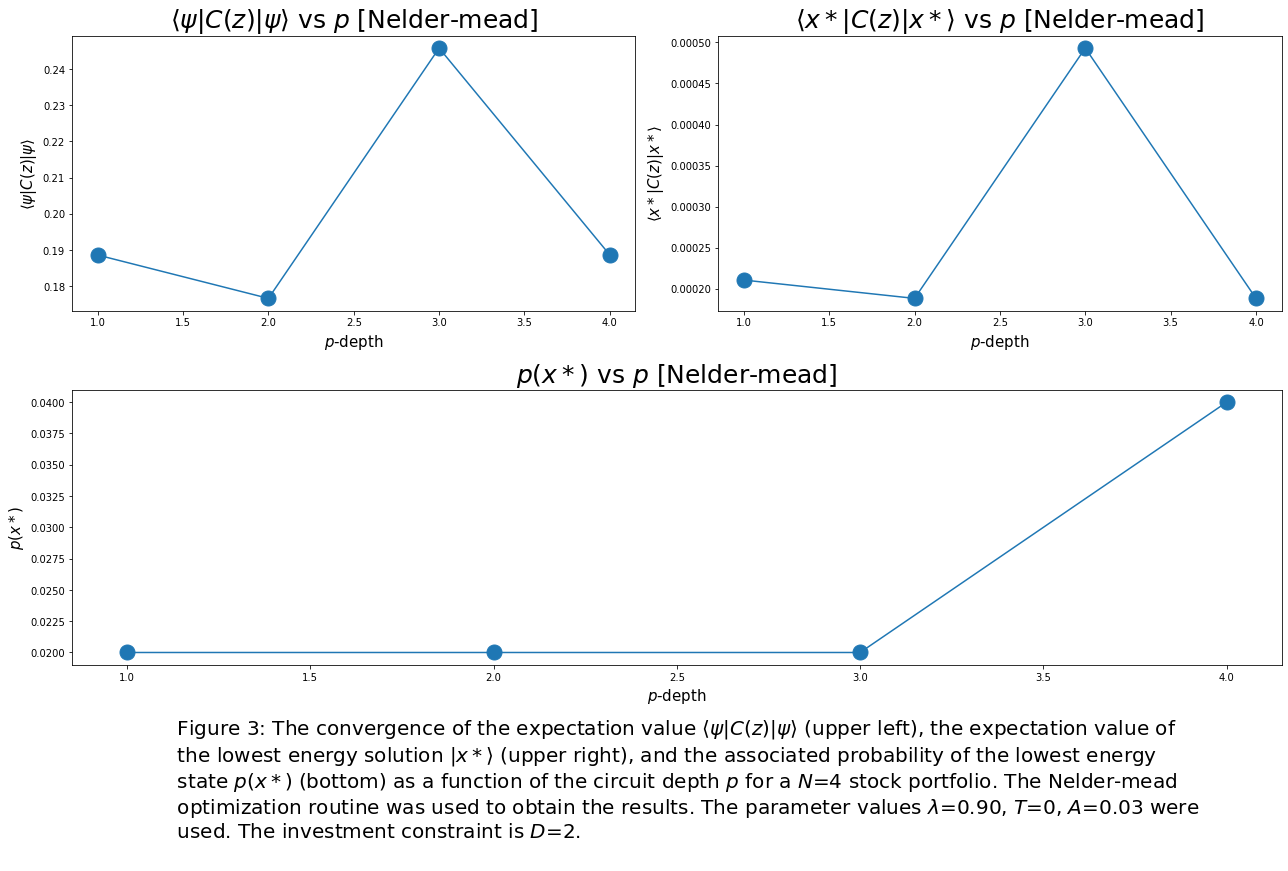

In [25]:
plot_parameters={}
plot_parameters['optimizer_name'] = "Nelder-mead"
plot_parameters['figure_number'] = 3
plot_parameters['optimizer_data'] = scipy_optimization_array_QAOA
plot_parameters['p_depth'] = p_depth
plot_parameters['lambda'] = benchmark_parameters['lam']
plot_parameters['D'] = benchmark_parameters['D']
plot_parameters['T'] = benchmark_parameters['T']
plot_parameters['A'] = benchmark_parameters['A']


scipy_plot = portfolio1.plot(plot_parameters)

plt.show()

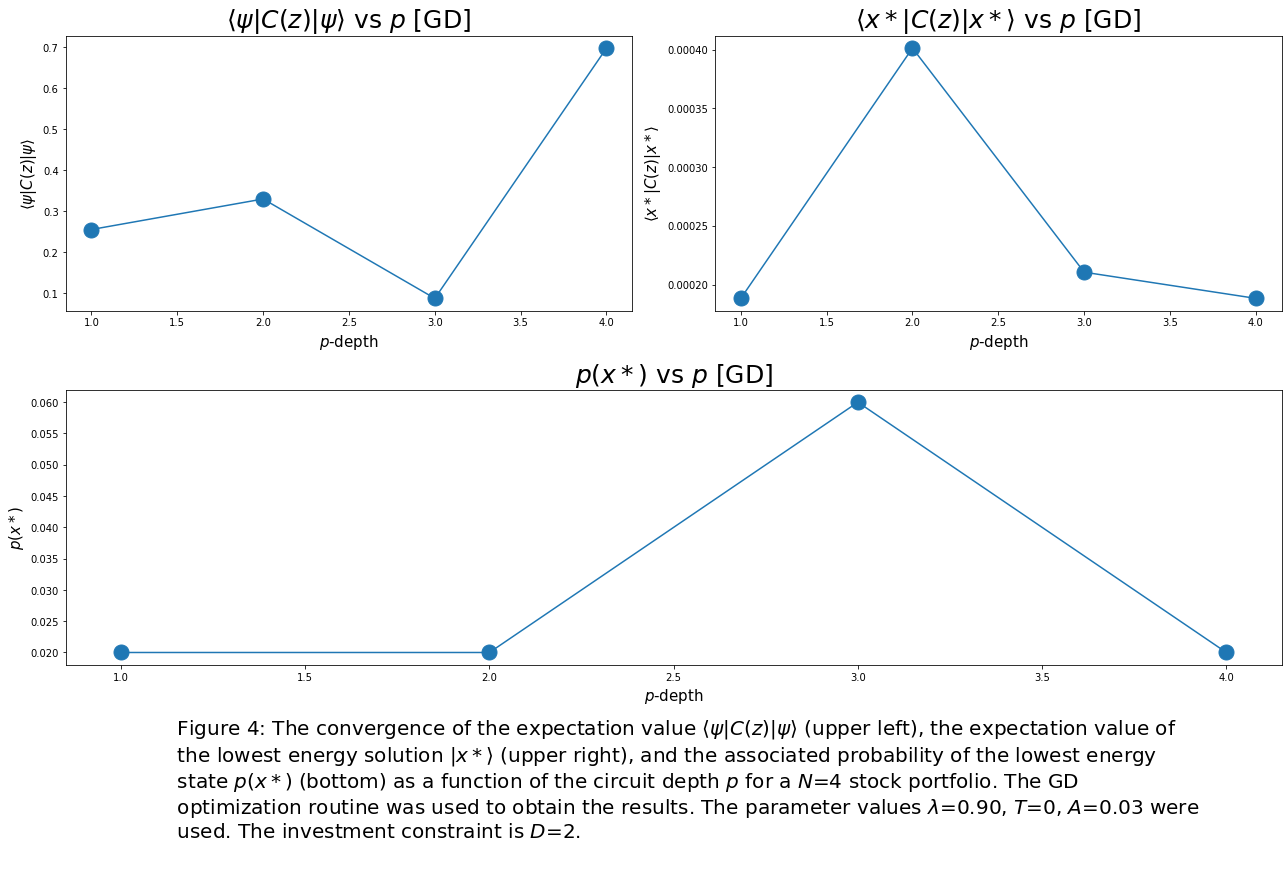

In [21]:
# Gradient descent [GD] applied to the QAOA circuit

plot_parameters={}
plot_parameters['figure_number'] = 4
plot_parameters['optimizer_name'] = "GD"
plot_parameters['optimizer_data'] = gd_optimization_array_QAOA
plot_parameters['p_depth'] = p_depth

plot_parameters['lambda'] = benchmark_parameters['lam']
plot_parameters['D'] = benchmark_parameters['D']
plot_parameters['T'] = benchmark_parameters['T']
plot_parameters['A'] = benchmark_parameters['A']


scipy_plot = portfolio1.plot(plot_parameters)

plt.show()

# Summary of QAOA-soft circuit 

In [26]:
print('='*100)
print('QAOA-soft Summary')
print('Maximum depth: ', p_depth[-1])
print('-'*100)
print('Brute-Force optimal solution: ', best_bruteforce_result['minimum_cost_states'])
print()
print('Grid-Search: ', best_QAOA_result['minimum_cost_states'])
print('Probability of best solution: ',best_QAOA_result['minimum_cost_probabilities'])
print('minimum cost solution: ',best_QAOA_result['minimum_cost'])
print()
print('Gradient descent optimizer: ',gd_optimization_array_QAOA[-1]['best_solutions']['minimum_cost_states'])
print('Probability of best solution: ',gd_optimization_array_QAOA[-1]['best_solutions']['minimum_cost_probabilities'])
print('Approximation ratio: ',best_bruteforce_result['minimum_cost']/gd_optimization_array_QAOA[-1]['best_solutions']['minimum_cost'])
print()
print('Scipy-Optimizer: ',scipy_optimization_array_QAOA[-1]['best_solutions']['minimum_cost_states'])
print('Probability of best solution: ',scipy_optimization_array_QAOA[-1]['best_solutions']['minimum_cost_probabilities'])
print('Approximation ratio: ',best_bruteforce_result['minimum_cost']/scipy_optimization_array_QAOA[-1]['best_solutions']['minimum_cost'])
print()
print('Cross-Entropy Optimizer: ',ce_optimization_array_QAOA[-1]['best_solutions']['minimum_cost_states'])
print('Probability of best solution: ',ce_optimization_array_QAOA[-1]['best_solutions']['minimum_cost_probabilities'])
print('Approximation ratio: ',best_bruteforce_result['minimum_cost']/ce_optimization_array_QAOA[-1]['best_solutions']['minimum_cost'])
print('='*100)

QAOA-soft Summary
Maximum depth:  4
----------------------------------------------------------------------------------------------------
Brute-Force optimal solution:  [[1 0 1 0]]

Grid-Search:  [[1 1 0 0]]
Probability of best solution:  [1.]
minimum cost solution:  0.00021057000000000004

Gradient descent optimizer:  [[1 0 1 0]]
Probability of best solution:  [0.02]
Approximation ratio:  1.0

Scipy-Optimizer:  [[1 0 1 0]]
Probability of best solution:  [0.04]
Approximation ratio:  1.0

Cross-Entropy Optimizer:  [[1 0 1 0]]
Probability of best solution:  [0.07]
Approximation ratio:  1.0


#QAOA-soft approximation ratio

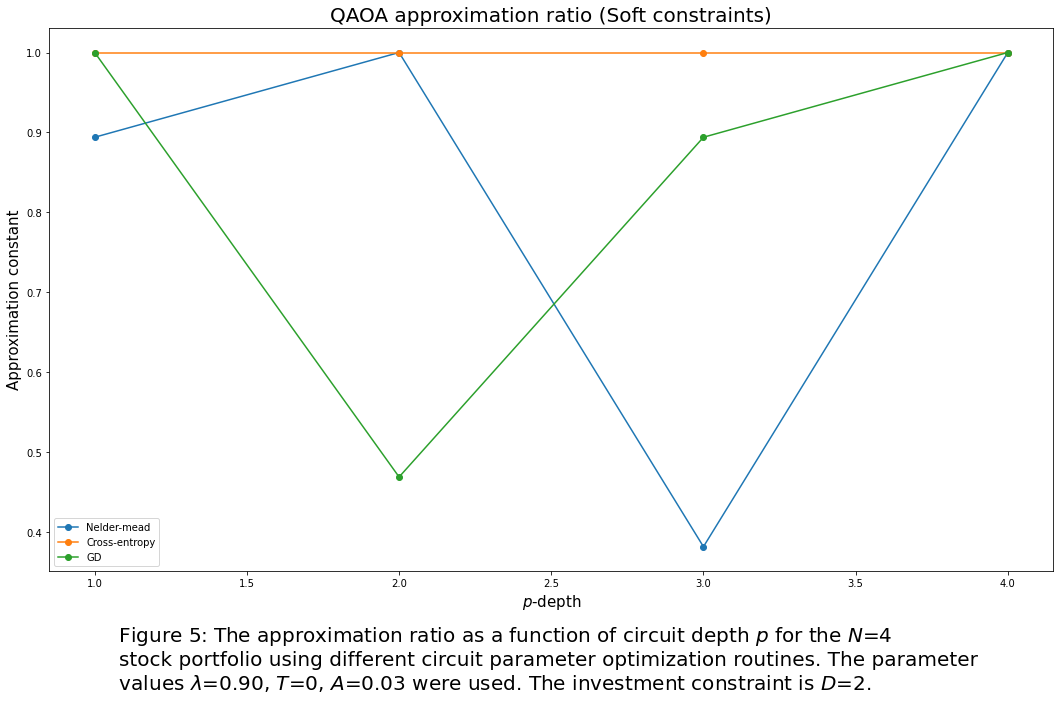

In [27]:
plot_parameters={}
plot_parameters['bruteforce_result'] = best_bruteforce_result
plot_parameters['p_depth'] = p_depth
plot_parameters['optimizers'] = [scipy_optimization_array_QAOA,ce_optimization_array_QAOA,gd_optimization_array_QAOA]
plot_parameters['optimizer_names'] = ['Nelder-mead','Cross-entropy','GD']
plot_parameters['figure_number'] = 5

plot_parameters['lambda'] = benchmark_parameters['lam']
plot_parameters['D'] = benchmark_parameters['D']
plot_parameters['T'] = benchmark_parameters['T']
plot_parameters['A'] = benchmark_parameters['A']
plot_parameters['title'] = "QAOA approximation ratio (Soft constraints)"

fig = portfolio1.plot_approximation_ratio(plot_parameters)
plt.legend()
plt.show()

#QAOA-hard circuit

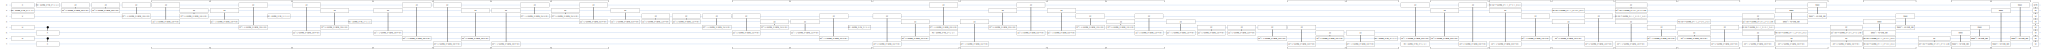

In [31]:
# Instantiate the portfolio 
portfolio1 = utils.Portfolio(N_portfolio=N_portfolio)

# Generate a QAOA circuit with p=1 depth
if(N_portfolio%2==0):
    D_const = N_portfolio/2
else:
    D_const = (N_portfolio+1)/2

AOA_circuit = portfolio1.QAOA_hard_circuit(p=1, D=D_const)

# plot the circuit
SVGCircuit(AOA_circuit)

#Grid search

In [32]:
# Determine the p=1 energy landscape for the QAOA 
if(load_from_file is True):
    AOA_results = portfolio1.load_data_from_json(data_folder)
else:
    AOA_results = portfolio1.grid_search(AOA_circuit,N_grid=N_grid,parameters=benchmark_parameters,n_trials=N_trials_grid)
    portfolio1.save_data_as_json(AOA_results,data_folder)


penalty_cost_grid_AOA = AOA_results['penalty_cost_grid']
total_cost_grid_AOA = AOA_results['total_cost_grid']
best_holdings_AOA = AOA_results['min_portfolio_holdings']

gamma_grid = AOA_results['gamma_grid']
beta_grid = AOA_results['beta_grid']

Minimum cost solution:  0.00021057000000000004
beta: 2.00* pi
gamma: 0.11* pi 


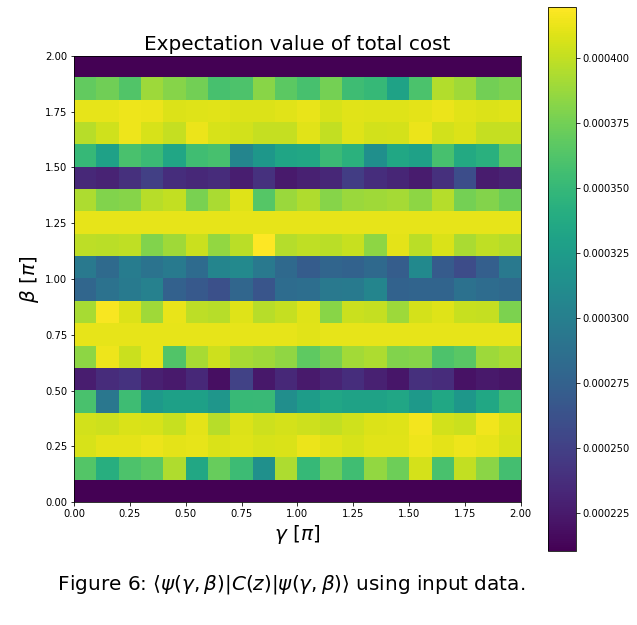

In [33]:
extent = [0.0,2.0, 0.0, 2.0]

print('='*100)
print('Minimum cost solution: ', AOA_results['minimum_cost'])
print('beta: {:.2f}* pi'.format(AOA_results['min_betas']/np.pi))
print('gamma: {:.2f}* pi '.format(AOA_results['min_gamma']/np.pi))
print('='*100)

plt.figure(figsize=(10,10))
plt.title('Expectation value of total cost',size=20)
plt.imshow(total_cost_grid_AOA[::-1],extent=extent)
plt.colorbar()
plt.xlabel(r'$\gamma \ [\pi]$',size=20)
plt.ylabel(r'$\beta \ [\pi]$',size=20)

text = r'''
        Figure {}: $\langle \psi(\gamma,\beta)|C(z)|\psi(\gamma,\beta) \rangle$ using input data.
        '''.format(6)
plt.text(-.3,-0.5, text, ha='left', size=20)
#plt.tight_layout()
plt.show()

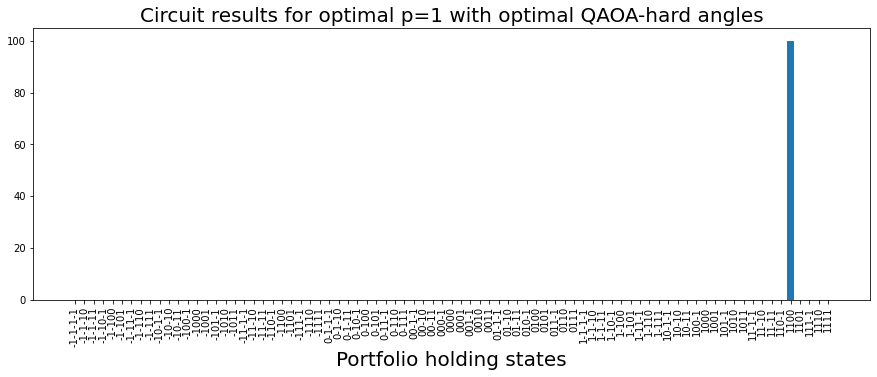

In [34]:
# Show the samples obtained from the experiments with the optimal angles

plt.figure(figsize=(15,5))
plt.title("Circuit results for optimal p=1 with optimal QAOA-hard angles",size=20)
plt.bar(np.arange(len(AOA_results['min_portfolio_holdings']['labels'])), AOA_results['min_portfolio_holdings']['counts'], tick_label=AOA_results['min_portfolio_holdings']['labels'])
plt.xticks(rotation=90)
plt.xlabel('Portfolio holding states',size=20)
plt.show()

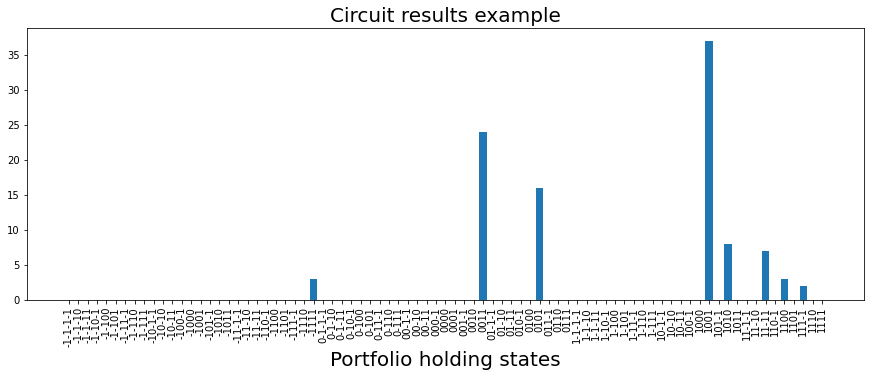

In [35]:
bitstrings = portfolio1.measure_circuit(AOA_circuit,parameters=benchmark_parameters,betas=[0.5],gammas=[0.5],n_trials=N_trials_grid)
portfolio_holdings = portfolio1.convert_bitstrings_to_portfolio_holdings(bitstrings)

plt.figure(figsize=(15,5))
plt.title("Circuit results example",size=20)
plt.bar(np.arange(len(portfolio_holdings['labels'])), portfolio_holdings['counts'], tick_label=portfolio_holdings['labels'])
plt.xticks(rotation=90)
plt.xlabel('Portfolio holding states',size=20)
plt.show()

In [36]:
# Get the best results from the gridsearch

best_AOA_result = portfolio1.determine_best_solution_from_trials(benchmark_parameters,best_holdings_AOA)

print('='*100)
print('QAOA-hard results:')
print('Cost of optimal states: E={:.6f}'.format(best_AOA_result['minimum_cost']))
print('Minimum energy states: z={}'.format(best_AOA_result['minimum_cost_states']))
print('Probability of minimum cost states: p={}'.format(best_AOA_result['minimum_cost_probabilities']))
print('='*100)

QAOA-hard results:
Cost of optimal states: E=0.000211
Minimum energy states: z=[[1 1 0 0]]
Probability of minimum cost states: p=[1.]


In [38]:
p_depth = np.array([1,2,3,4]).astype(int)

AOA_circuit_p_array = []


# Generate a QAOA circuit with p=1 depth
for p in p_depth:
    AOA_circuit_p_array.append(portfolio1.QAOA_hard_circuit(D=D_const,p=p))

#QAOA-hard with SciPy optimizer

In [40]:
 # Optimize the AOA circuit using Scipy-optimizer
scipy_optimization_array_AOA= []

if(load_from_file is True):
    
    for p in range(len(p_depth)):
        scipy_optimization_results = portfolio1.load_data_from_json(data_folder)
        #scipy_optimization_results = portfolio1.load_data_from_json(data_folder+'/AOA_scipy_p'+str(p)+'.json')
        scipy_optimization_array_AOA.append(scipy_optimization_results)
else:

    for k in range(len(p_depth)):
        AOA_circuit_p = AOA_circuit_p_array[k]
        scipy_optimization_results = portfolio1.optimize_circuit(circuit=AOA_circuit_p,
                                                                 parameters=benchmark_parameters,
                                                                 n_trials=N_trials_scipy,
                                                                 p=p_depth[k])

        print('='*100)
        print('p-depth: ', p_depth[k])
        print('AOA scipy results:')
        print('Cost of optimal states: E={:.6f}'.format(scipy_optimization_results['best_solutions']['minimum_cost']))
        print('Minimum energy states: z={}'.format(scipy_optimization_results['best_solutions']['minimum_cost_states']))
        print('Probability of minimum cost states: p={}'.format(scipy_optimization_results['best_solutions']['minimum_cost_probabilities']))
        print('='*100)

        scipy_optimization_array_AOA.append(scipy_optimization_results)

# Save the results to a file
for p in range(len(p_depth)):
    portfolio1.save_data_as_json(scipy_optimization_array_AOA[p],data_folder)
    #portfolio1.save_data_as_json(scipy_optimization_array_AOA[p],data_folder+'/AOA_scipy_p'+str(p)+'.json')

Optimization terminated successfully.
         Current function value: 0.000374
         Iterations: 21
         Function evaluations: 52
optimal cost:  0.0003738431999999999
p-depth:  1
AOA scipy results:
Cost of optimal states: E=0.000188
Minimum energy states: z=[[1 0 1 0]]
Probability of minimum cost states: p=[0.04]
Optimization terminated successfully.
         Current function value: 0.000358
         Iterations: 24
         Function evaluations: 79
optimal cost:  0.000357626
p-depth:  2
AOA scipy results:
Cost of optimal states: E=0.000188
Minimum energy states: z=[[1 0 1 0]]
Probability of minimum cost states: p=[0.08]
Optimization terminated successfully.
         Current function value: 0.000296
         Iterations: 35
         Function evaluations: 109
optimal cost:  0.0002961136
p-depth:  3
AOA scipy results:
Cost of optimal states: E=0.000188
Minimum energy states: z=[[1 0 1 0]]
Probability of minimum cost states: p=[0.32]
optimal cost:  0.0003714548
p-depth:  4
AOA scipy

#QAOA-hard with cross entropy optimization

In [41]:
ce_optimization_array_AOA = []


if(load_from_file is True):
    
    for p in range(len(p_depth)):
        ce_results = portfolio1.load_data_from_json(data_folder)
        #ce_results = portfolio1.load_data_from_json(data_folder+'/AOA_ce_p'+str(p)+'.json')
        ce_optimization_array_AOA.append(ce_results)
else:
    
    for k in range(len(p_depth)):
        AOA_circuit_p = AOA_circuit_p_array[k]

        ce_results =portfolio1.optimize_circuit_angles_cross_entropy(AOA_circuit_p,
                                                                     benchmark_parameters,
                                                                     p=p_depth[k],
                                                                     n_trials=N_trials_ce,
                                                                     iterations=N_ce_iterations,
                                                                     f_elite=f_elite,
                                                                     Nce_samples = N_ce_samples)
        print('='*100)
        print('p-depth: ', p_depth[k])
        print('AOA Cross entropy optimization results:')
        print('Cost of optimal states: E={:.6f}'.format(ce_results['best_solutions']['minimum_cost']))
        print('Minimum energy states: z={}'.format(ce_results['best_solutions']['minimum_cost_states']))
        print('Probability of minimum cost states: p={}'.format(ce_results['best_solutions']['minimum_cost_probabilities']))
        print('='*100)

        ce_optimization_array_AOA.append(ce_results)

# Save the results to a file
for p in range(len(p_depth)):
    portfolio1.save_data_as_json(scipy_optimization_array_AOA[p],data_folder)
    #portfolio1.save_data_as_json(scipy_optimization_array_AOA[p],data_folder+'/AOA_ce_p'+str(p)+'.json')

100%|██████████| 50/50 [00:09<00:00,  5.22it/s]


k=0, mean_E=0.000231, std_E=0.000017, gammas[pi]=[1.53616493], betas[pi]=[0.28977931]


100%|██████████| 50/50 [00:09<00:00,  5.22it/s]


k=1, mean_E=0.000215, std_E=0.000004, gammas[pi]=[1.44031395], betas[pi]=[0.50410645]


100%|██████████| 50/50 [00:09<00:00,  5.26it/s]


k=2, mean_E=0.000217, std_E=0.000005, gammas[pi]=[1.34192723], betas[pi]=[0.61112326]


100%|██████████| 50/50 [00:09<00:00,  5.18it/s]


k=3, mean_E=0.000216, std_E=0.000002, gammas[pi]=[1.35331152], betas[pi]=[0.3951993]


100%|██████████| 50/50 [00:09<00:00,  5.33it/s]


k=4, mean_E=0.000211, std_E=0.000000, gammas[pi]=[1.5303681], betas[pi]=[-0.00534492]


100%|██████████| 50/50 [00:09<00:00,  5.23it/s]


k=5, mean_E=0.000215, std_E=0.000006, gammas[pi]=[1.57503945], betas[pi]=[-0.20069423]


100%|██████████| 50/50 [00:10<00:00,  4.92it/s]


k=6, mean_E=0.000220, std_E=0.000012, gammas[pi]=[1.57079166], betas[pi]=[-0.19720814]


100%|██████████| 50/50 [00:09<00:00,  5.20it/s]


k=7, mean_E=0.000216, std_E=0.000003, gammas[pi]=[1.52147227], betas[pi]=[0.0958817]


100%|██████████| 50/50 [00:09<00:00,  5.02it/s]


k=8, mean_E=0.000210, std_E=0.000000, gammas[pi]=[1.54066185], betas[pi]=[0.00193395]


100%|██████████| 50/50 [00:09<00:00,  5.26it/s]


k=9, mean_E=0.000210, std_E=0.000000, gammas[pi]=[1.54426646], betas[pi]=[-0.00138636]
p-depth:  1
AOA Cross entropy optimization results:
Cost of optimal states: E=0.000211
Minimum energy states: z=[[1 1 0 0]]
Probability of minimum cost states: p=[1.]


100%|██████████| 50/50 [00:11<00:00,  4.30it/s]


k=0, mean_E=0.000219, std_E=0.000017, gammas[pi]=[0.2058154  0.77746126], betas[pi]=[1.17670351 0.04166197]


100%|██████████| 50/50 [00:11<00:00,  4.52it/s]


k=1, mean_E=0.000204, std_E=0.000011, gammas[pi]=[0.22727999 0.88809932], betas[pi]=[1.18724367 0.05393203]


100%|██████████| 50/50 [00:11<00:00,  4.52it/s]


k=2, mean_E=0.000218, std_E=0.000015, gammas[pi]=[0.31871743 0.88224405], betas[pi]=[1.23138781 0.15295744]


100%|██████████| 50/50 [00:11<00:00,  4.49it/s]


k=3, mean_E=0.000196, std_E=0.000006, gammas[pi]=[0.26465753 0.90984947], betas[pi]=[1.24313182 0.3774671 ]


100%|██████████| 50/50 [00:11<00:00,  4.27it/s]


k=4, mean_E=0.000200, std_E=0.000004, gammas[pi]=[0.28115764 0.80652842], betas[pi]=[1.2563674  0.55610647]


100%|██████████| 50/50 [00:11<00:00,  4.48it/s]


k=5, mean_E=0.000188, std_E=0.000000, gammas[pi]=[0.28975338 0.70286605], betas[pi]=[1.27021958 0.76042564]


100%|██████████| 50/50 [00:11<00:00,  4.43it/s]


k=6, mean_E=0.000188, std_E=0.000000, gammas[pi]=[0.24027683 0.78517559], betas[pi]=[1.26353654 0.74831607]


100%|██████████| 50/50 [00:11<00:00,  4.46it/s]


k=7, mean_E=0.000188, std_E=0.000000, gammas[pi]=[0.22964016 0.80322059], betas[pi]=[1.26214923 0.74554957]


100%|██████████| 50/50 [00:11<00:00,  4.51it/s]


k=8, mean_E=0.000188, std_E=0.000000, gammas[pi]=[0.23060955 0.80125791], betas[pi]=[1.26214889 0.74546529]


100%|██████████| 50/50 [00:11<00:00,  4.53it/s]


k=9, mean_E=0.000188, std_E=0.000000, gammas[pi]=[0.22748764 0.80354564], betas[pi]=[1.26095122 0.74396348]
p-depth:  2
AOA Cross entropy optimization results:
Cost of optimal states: E=0.000188
Minimum energy states: z=[[1 0 1 0]]
Probability of minimum cost states: p=[1.]


100%|██████████| 50/50 [00:12<00:00,  3.96it/s]


k=0, mean_E=0.000260, std_E=0.000012, gammas[pi]=[0.3971217  1.23770746 1.91891558], betas[pi]=[0.87700461 1.83964324 0.13242099]


100%|██████████| 50/50 [00:12<00:00,  3.97it/s]


k=1, mean_E=0.000245, std_E=0.000019, gammas[pi]=[0.59295561 1.41144702 1.99265492], betas[pi]=[0.71249515 1.8860821  0.01432411]


100%|██████████| 50/50 [00:12<00:00,  3.95it/s]


k=2, mean_E=0.000247, std_E=0.000032, gammas[pi]=[0.43792646 1.52998979 2.01878192], betas[pi]=[ 0.88663015  1.95937584 -0.04118025]


100%|██████████| 50/50 [00:12<00:00,  3.95it/s]


k=3, mean_E=0.000244, std_E=0.000019, gammas[pi]=[0.21822149 1.66317548 2.04980275], betas[pi]=[ 1.0635007   2.05793708 -0.09942801]


100%|██████████| 50/50 [00:12<00:00,  3.94it/s]


k=4, mean_E=0.000254, std_E=0.000005, gammas[pi]=[0.4513208  1.5858335  2.01922728], betas[pi]=[ 0.88160569  1.98241314 -0.07648623]


100%|██████████| 50/50 [00:12<00:00,  3.98it/s]


k=5, mean_E=0.000262, std_E=0.000016, gammas[pi]=[0.35250702 1.42365243 2.02769555], betas[pi]=[0.93344762 1.93724108 0.03358892]


100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


k=6, mean_E=0.000221, std_E=0.000006, gammas[pi]=[0.27957382 1.44696939 2.03739458], betas[pi]=[0.98579663 1.96271569 0.02711686]


100%|██████████| 50/50 [00:12<00:00,  3.99it/s]


k=7, mean_E=0.000213, std_E=0.000003, gammas[pi]=[0.3603383  1.31015036 2.02385605], betas[pi]=[0.89327668 1.89752836 0.10280759]


100%|██████████| 50/50 [00:12<00:00,  3.89it/s]


k=8, mean_E=0.000213, std_E=0.000003, gammas[pi]=[0.30020369 1.43296453 2.03447491], betas[pi]=[0.96789191 1.95337868 0.0335433 ]


100%|██████████| 50/50 [00:12<00:00,  3.92it/s]


k=9, mean_E=0.000212, std_E=0.000002, gammas[pi]=[0.30378009 1.43086552 2.03399713], betas[pi]=[0.96529442 1.95177869 0.03445491]
p-depth:  3
AOA Cross entropy optimization results:
Cost of optimal states: E=0.000211
Minimum energy states: z=[[1 1 0 0]]
Probability of minimum cost states: p=[1.]


100%|██████████| 50/50 [00:14<00:00,  3.53it/s]


k=0, mean_E=0.000271, std_E=0.000017, gammas[pi]=[0.0529315  1.5494389  0.25381276 0.96655465], betas[pi]=[1.94041409 1.93938793 0.82374571 0.97151417]


100%|██████████| 50/50 [00:14<00:00,  3.54it/s]


k=1, mean_E=0.000234, std_E=0.000011, gammas[pi]=[0.00922778 1.74334546 0.19543791 0.78881954], betas[pi]=[1.82879132 1.99620727 0.76032178 0.84535746]


100%|██████████| 50/50 [00:14<00:00,  3.52it/s]


k=2, mean_E=0.000241, std_E=0.000020, gammas[pi]=[0.05424191 1.85292553 0.12600253 0.89808307], betas[pi]=[1.96112896 1.7467741  0.96200231 0.79413467]


100%|██████████| 50/50 [00:15<00:00,  3.33it/s]


k=3, mean_E=0.000262, std_E=0.000016, gammas[pi]=[0.12034567 1.96804974 0.05393325 0.94557538], betas[pi]=[2.13184344 1.71350185 0.9280196  0.79890748]


100%|██████████| 50/50 [00:14<00:00,  3.35it/s]


k=4, mean_E=0.000238, std_E=0.000017, gammas[pi]=[-0.21860752  1.53020045  0.36205697  0.77961564], betas[pi]=[1.20130457 1.95757581 0.91633474 0.68420601]


100%|██████████| 50/50 [00:14<00:00,  3.50it/s]


k=5, mean_E=0.000217, std_E=0.000003, gammas[pi]=[-0.03611411  1.75607652  0.19479345  0.87724779], betas[pi]=[1.71438975 1.76198319 0.99258621 0.74613206]


100%|██████████| 50/50 [00:14<00:00,  3.50it/s]


k=6, mean_E=0.000212, std_E=0.000002, gammas[pi]=[-0.05442993  1.73053885  0.22021991  0.8702269 ], betas[pi]=[1.66021982 1.77836508 1.00515085 0.73432183]


100%|██████████| 50/50 [00:14<00:00,  3.55it/s]


k=7, mean_E=0.000210, std_E=0.000000, gammas[pi]=[-0.02192912  1.77371105  0.18012727  0.88351122], betas[pi]=[1.75489574 1.74886252 0.99288551 0.75278463]


100%|██████████| 50/50 [00:14<00:00,  3.50it/s]


k=8, mean_E=0.000210, std_E=0.000000, gammas[pi]=[-0.02165121  1.77404135  0.17988013  0.88367753], betas[pi]=[1.75568943 1.7484704  0.99312316 0.75286942]


100%|██████████| 50/50 [00:14<00:00,  3.51it/s]


k=9, mean_E=0.000210, std_E=0.000000, gammas[pi]=[-0.02169724  1.77390406  0.18060119  0.88432411], betas[pi]=[1.7553926  1.7470314  0.99612769 0.75204084]
p-depth:  4
AOA Cross entropy optimization results:
Cost of optimal states: E=0.000211
Minimum energy states: z=[[1 1 0 0]]
Probability of minimum cost states: p=[1.]


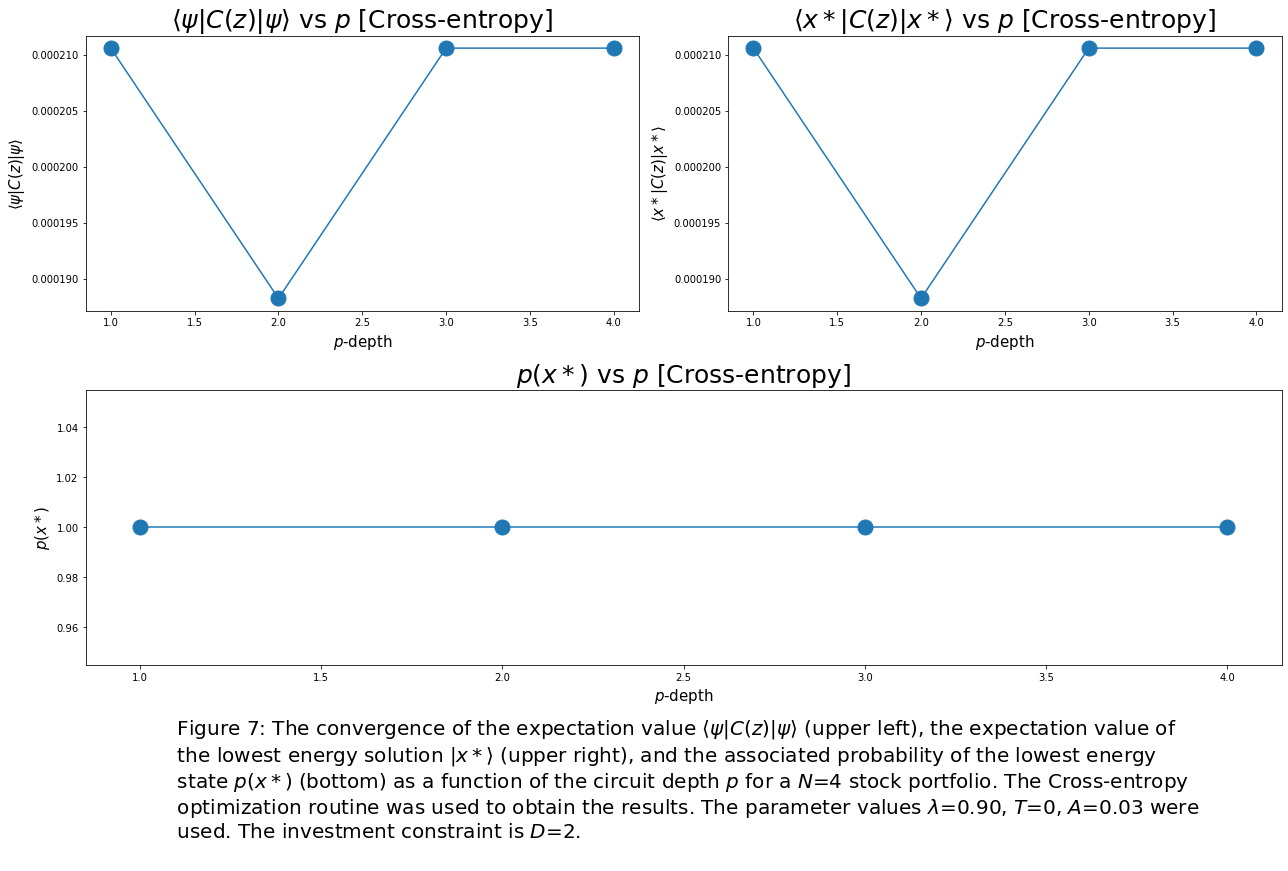

In [42]:
plot_parameters={}
plot_parameters['figure_number'] = 7
plot_parameters['optimizer_name'] = "Cross-entropy"
plot_parameters['optimizer_data'] = ce_optimization_array_AOA
plot_parameters['p_depth'] = p_depth

plot_parameters['lambda'] = benchmark_parameters['lam']
plot_parameters['D'] = benchmark_parameters['D']
plot_parameters['T'] = benchmark_parameters['T']
plot_parameters['A'] = benchmark_parameters['A']


scipy_plot = portfolio1.plot(plot_parameters)

plt.show()

#QAOA-hard summary

In [43]:
print('='*100)
print('QAOA-hard Summary')
print('Maximum depth: ', p_depth[-1])
print('-'*100)
print('Brute-Force optimal solution: ', best_bruteforce_result['minimum_cost_states'])
print('Brute-Force optimal solution: ', best_bruteforce_result['minimum_cost'])
print()
print('Grid-Search: ', best_AOA_result['minimum_cost_states'])
print('Probability of best solution: ',best_QAOA_result['minimum_cost_probabilities'])
print('Approximation ratio: ',best_bruteforce_result['minimum_cost']/best_QAOA_result['minimum_cost'])
print()
print('Scipy-Optimizer: ',scipy_optimization_array_AOA[-1]['best_solutions']['minimum_cost_states'])
print('Probability of best solution: ',scipy_optimization_array_AOA[-1]['best_solutions']['minimum_cost_probabilities'])
print('Approximation ratio: ',best_bruteforce_result['minimum_cost']/scipy_optimization_array_AOA[-1]['best_solutions']['minimum_cost'])
print()
print('Cross-Entropy Optimizer: ',ce_optimization_array_AOA[-1]['best_solutions']['minimum_cost_states'])
print('Probability of best solution: ',ce_optimization_array_AOA[-1]['best_solutions']['minimum_cost_probabilities'])
print('Approximation ratio: ',best_bruteforce_result['minimum_cost']/ce_optimization_array_AOA[-1]['best_solutions']['minimum_cost'])
print('='*100)

QAOA-hard Summary
Maximum depth:  4
----------------------------------------------------------------------------------------------------
Brute-Force optimal solution:  [[1 0 1 0]]
Brute-Force optimal solution:  0.00018825000000000008

Grid-Search:  [[1 1 0 0]]
Probability of best solution:  [1.]
Approximation ratio:  0.8940019945861236

Scipy-Optimizer:  [[1 0 1 0]]
Probability of best solution:  [0.04]
Approximation ratio:  1.0

Cross-Entropy Optimizer:  [[1 1 0 0]]
Probability of best solution:  [1.]
Approximation ratio:  0.8940019945861236


#QAOA-hard approximation ratio

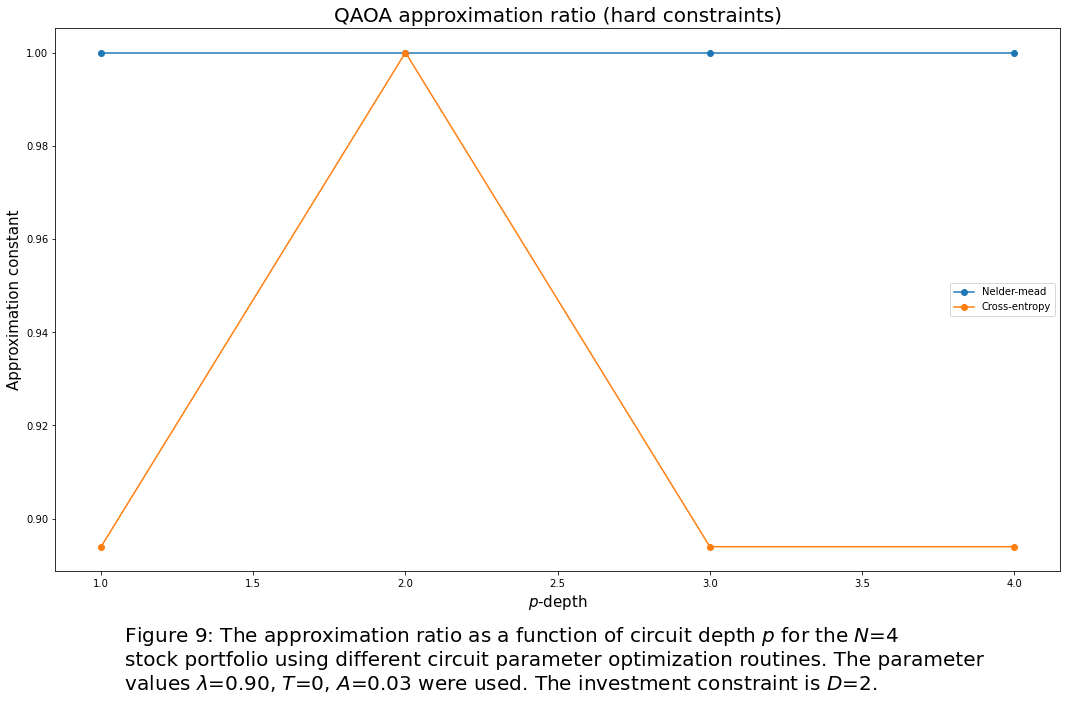

In [44]:
plot_parameters={}
plot_parameters['bruteforce_result'] = best_bruteforce_result
plot_parameters['p_depth'] = p_depth
plot_parameters['optimizers'] = [scipy_optimization_array_AOA,ce_optimization_array_AOA]
plot_parameters['optimizer_names'] = ['Nelder-mead','Cross-entropy']
plot_parameters['figure_number'] = 9

plot_parameters['lambda'] = benchmark_parameters['lam']
plot_parameters['D'] = benchmark_parameters['D']
plot_parameters['T'] = benchmark_parameters['T']
plot_parameters['A'] = benchmark_parameters['A']
plot_parameters['title'] = "QAOA approximation ratio (hard constraints)"

fig = portfolio1.plot_approximation_ratio(plot_parameters)
plt.legend()
plt.show()